**Seeding for reproducibility**

In [19]:
# Set seeds for reproducibility
import random
random.seed (0)
import numpy as np
np. random. seed (0)
import tensorflow as tf
tf. random.set_seed (0)


In [20]:
!pip show Pillow

Name: pillow
Version: 11.0.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: 
Author-email: "Jeffrey A. Clark" <aclark@aclark.net>
License: MIT-CMU
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: bokeh, diffusers, dopamine_rl, fastai, imageio, imgaug, matplotlib, scikit-image, sentence-transformers, torchvision, wordcloud


**Importing the dependencies**

In [21]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data curation**

In [22]:
!pip install kaggle

In [23]:
kaggle_credentails = json.load(open("kaggle.json"))

In [24]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [25]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [26]:
!ls

 kaggle.json  'plantvillage dataset'   plantvillage-dataset.zip   sample_data


In [27]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [28]:

# Define the directory path
directory_path = "plantvillage dataset"

# List subdirectories
subdirectories = os.listdir(directory_path)

# Print subdirectories
print("Subdirectories in the dataset:")
for subdirectory in subdirectories:
    print("-", subdirectory)

# Function to display sample images
def display_sample_images(subdirectory, num_samples=3):
    print("\nSample images from", subdirectory, "category:")
    subdirectory_path = os.path.join(directory_path, subdirectory)
    images = [f for f in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, f))]
    sample_images = random.sample(images, min(num_samples, len(images)))
    plt.figure(figsize=(num_samples * 3, 3))
    for i, image_name in enumerate(sample_images, 1):
        image_path = os.path.join(subdirectory_path, image_name)
        img = mpimg.imread(image_path)
        plt.subplot(1, num_samples, i)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Display sample images from 'segmented' directory
segmented_directory = "segmented"
num_segmented_samples = 3
print("\nNumber of images in 'segmented' directory:", len(os.listdir(os.path.join(directory_path, segmented_directory))))
print("Names of the first 5 images in 'segmented' directory:")
print(os.listdir(os.path.join(directory_path, segmented_directory))[:5])
display_sample_images(segmented_directory, num_segmented_samples)

# Display sample images from 'color' directory
color_directory = "color"
num_color_samples = 3
print("\nNumber of images in 'color' directory:", len(os.listdir(os.path.join(directory_path, color_directory))))
print("Names of the first 5 images in 'color' directory:")
print(os.listdir(os.path.join(directory_path, color_directory))[:5])
display_sample_images(color_directory, num_color_samples)

# Display sample images from 'grayscale' directory
grayscale_directory = "grayscale"
num_grayscale_samples = 3
print("\nNumber of images in 'grayscale' directory:", len(os.listdir(os.path.join(directory_path, grayscale_directory))))
print("Names of the first 5 images in 'grayscale' directory:")
print(os.listdir(os.path.join(directory_path, grayscale_directory))[:5])
display_sample_images(grayscale_directory, num_grayscale_samples)


Subdirectories in the dataset:
- grayscale
- color
- segmented

Number of images in 'segmented' directory: 38
Names of the first 5 images in 'segmented' directory:
['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Target_Spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Late_blight']

Sample images from segmented category:


<Figure size 900x300 with 0 Axes>


Number of images in 'color' directory: 38
Names of the first 5 images in 'color' directory:
['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Target_Spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Late_blight']

Sample images from color category:


<Figure size 900x300 with 0 Axes>


Number of images in 'grayscale' directory: 38
Names of the first 5 images in 'grayscale' directory:
['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Target_Spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Late_blight']

Sample images from grayscale category:


<Figure size 900x300 with 0 Axes>

Number of images in the directory: 423
Names of the first 5 images:
['29ffbe00-4f75-496b-8bb5-dc1be1eb73b3___Mt.N.V_HL 8956.JPG', '61a531ba-3d52-4af3-8828-c2dbba4d3b1d___Mt.N.V_HL 8941.JPG', '63e38ffd-dfb4-4fc0-aee2-0e6da78a9915___Mt.N.V_HL 6028.JPG', '98483d5a-cdee-4a61-9cb3-03913dbaa850___Mt.N.V_HL 9116.JPG', 'f2b57b85-6951-4248-b52b-f56e800e9cec___Mt.N.V_HL 9072.JPG']


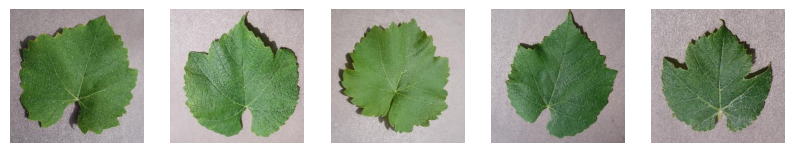

In [29]:


# Define the directory path
directory_path = "plantvillage dataset/color/Grape___healthy"

# Count the number of images in the directory
num_images = len(os.listdir(directory_path))

print("Number of images in the directory:", num_images)

# Print the names of the first 5 images
print("Names of the first 5 images:")
print(os.listdir(directory_path)[:5])

# Display sample images
plt.figure(figsize=(10, 5))
for i in range(5):
    # Load and display each image
    image_path = os.path.join(directory_path, os.listdir(directory_path)[i])
    img = mpimg.imread(image_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.show()


Data Preprocessing

In [30]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)
196608


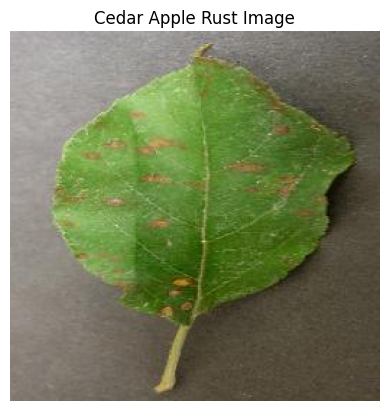

In [31]:
import cv2

# Define the image path
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
print(img.size)
# Resize the image (optional)
# img = cv2.resize(img, (width, height))  # Adjust width and height as needed

# Apply histogram equalization for color enhancement (optional)
# enhanced_img = cv2.equalizeHist(img)  # Apply histogram equalization

# Add a border around the image (optional)
# img = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=[255, 255, 255])

# Plot the image
plt.imshow(img)

# Add title (optional)
plt.title("Cedar Apple Rust Image")

# Add text annotation (optional)
# plt.text(10, 10, "Image Source: PlantVillage Dataset", color='white')

# Turn off axis numbers
plt.axis('off')

# Show the image
plt.show()

Image Array:
[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]

Image Metadata:
Shape: (256, 256, 3)
Min Value: 0
Max Value: 243


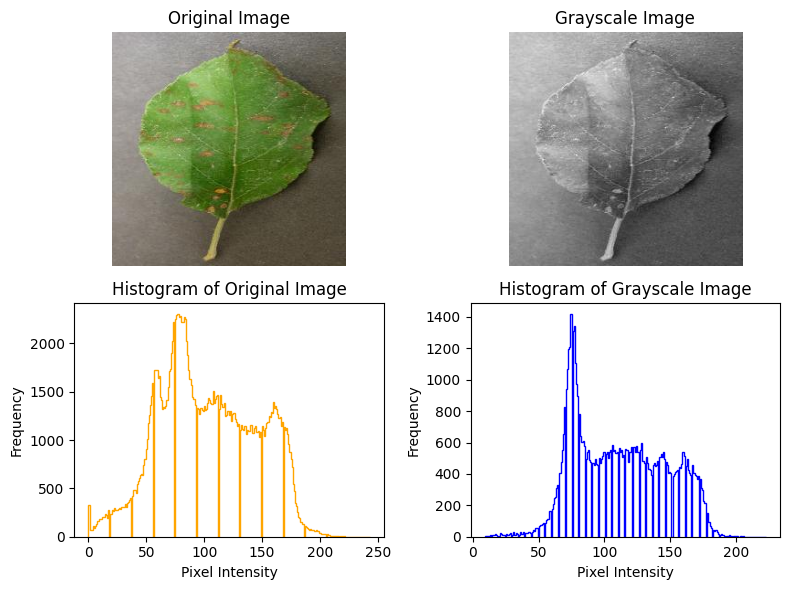

In [32]:

# Define the image path
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

# Print the image array
print("Image Array:")
print(img)

# Display image metadata
print("\nImage Metadata:")
print("Shape:", img.shape)
print("Min Value:", img.min())
print("Max Value:", img.max())

# Plot the image
plt.figure(figsize=(8, 6))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Apply grayscale transformation
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Display grayscale image
plt.subplot(2, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Display histogram of the original image
plt.subplot(2, 2, 3)
plt.hist(img.ravel(), bins=256, color='orange', histtype='step')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Display histogram of the grayscale image
plt.subplot(2, 2, 4)
plt.hist(gray_img.ravel(), bins=256, color='blue', histtype='step')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [33]:
# Image Parameters
img_size = 224  # Size of the images (width and height)
batch_size = 32  # Number of images in each batch for processing


Train Test Split

In [34]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

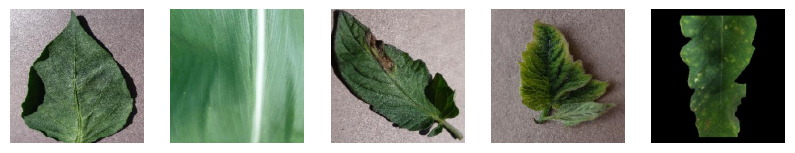

In [40]:
# Display sample batch of training images
def display_train_images(train_generator, num_samples=5):
    """
    Display a sample batch of training images generated by the train generator.

    Args:
    - train_generator: An instance of DirectoryIterator yielding training data batches
    - num_samples: Number of sample images to display
    """
    # Generate a batch of training images
    batch_images, batch_labels = next(train_generator)

    # Plot the sample training images
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(batch_images[i])
        plt.axis('off')
    plt.show()

# Example usage
display_train_images(train_generator)

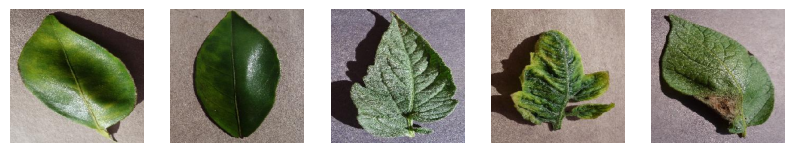

In [41]:
# Display sample batch of validation images
def display_validation_images(validation_generator, num_samples=5):
    """
    Display a sample batch of validation images generated by the validation generator.

    Args:
    - validation_generator: An instance of DirectoryIterator yielding validation data batches
    - num_samples: Number of sample images to display
    """
    # Generate a batch of validation images
    batch_images, batch_labels = next(validation_generator)

    # Plot the sample validation images
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(batch_images[i])
        plt.axis('off')
    plt.show()

# Example usage
display_validation_images(validation_generator)


**Convolutional Neural** **Network**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

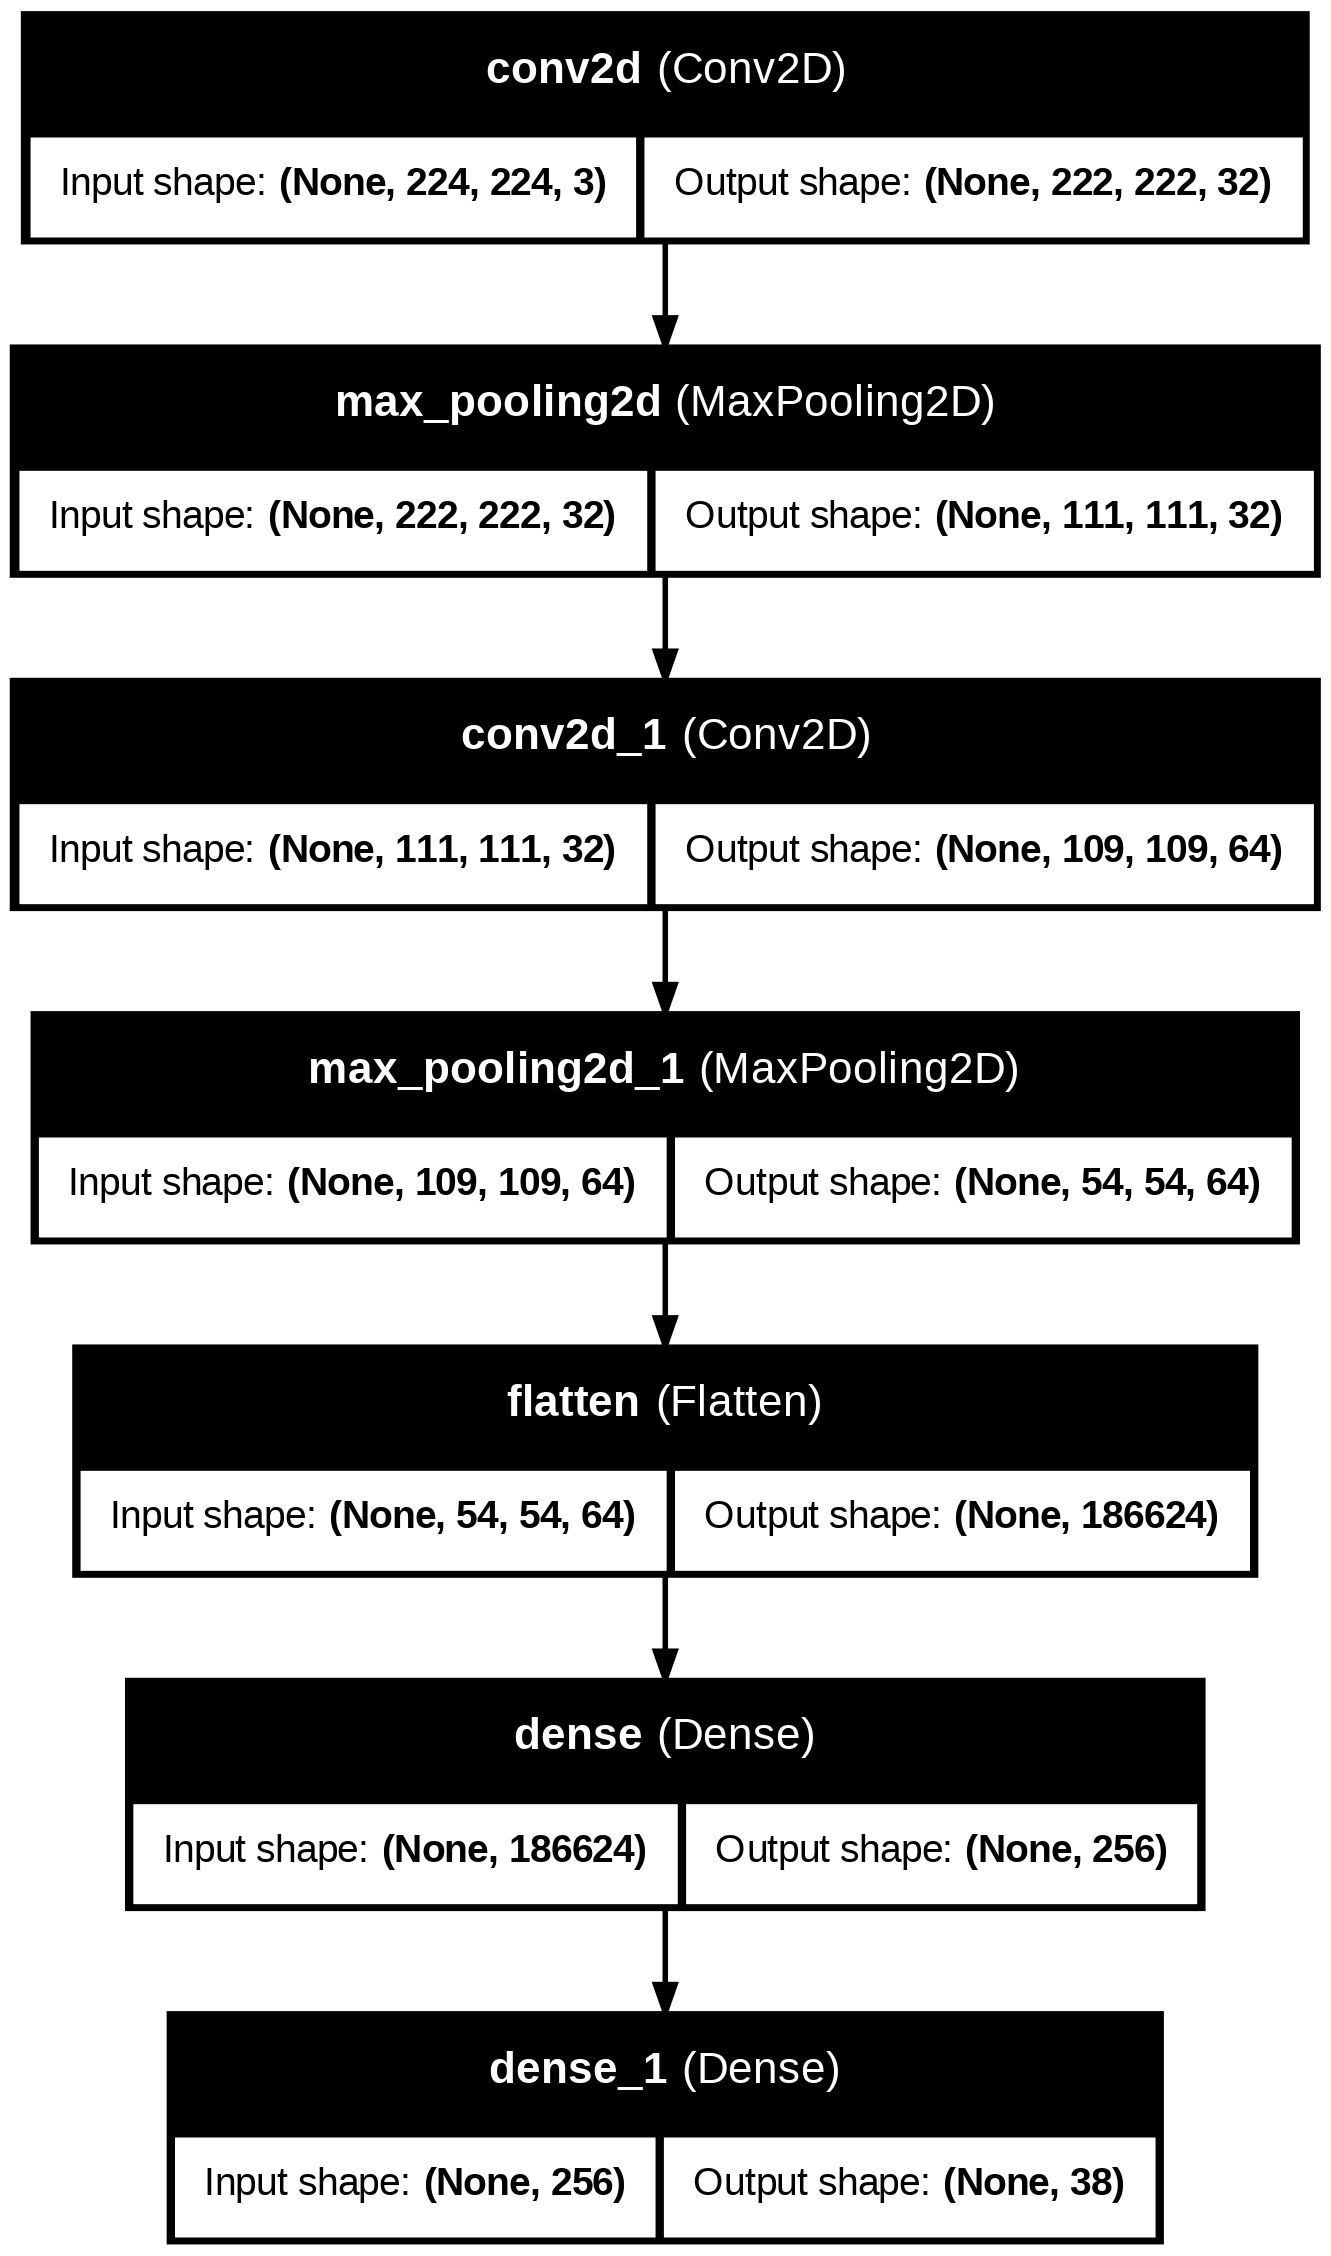

In [42]:
# Model Definition
model = models.Sequential()

# Add Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))  # Add MaxPooling

# Add Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))  # Add MaxPooling

# Flatten Layer
model.add(layers.Flatten())

# Fully Connected Layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Print Model Summary
print("Model Summary:")
model.summary()

# Visualize Model Architecture
from tensorflow.keras.utils import plot_model

# Save model architecture to an image file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display Model Architecture
from IPython.display import Image
Image("model_architecture.png")


In [43]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model** **Training**

In [44]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 130s 90ms/step - accuracy: 0.6038 - loss: 1.8714 - val_accuracy: 0.8489 - val_loss: 0.4759
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0943
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 100s 73ms/step - accuracy: 0.9184 - loss: 0.2556 - val_accuracy: 0.8687 - val_loss: 0.4368
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1173
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 141s 76ms/step - accuracy: 0.9641 - loss: 0.1109 - val_accuracy: 0.8550 - val_loss: 0.5372


**Model Evalution**

In [45]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8582 - loss: 0.5282
Validation Accuracy: 85.50%


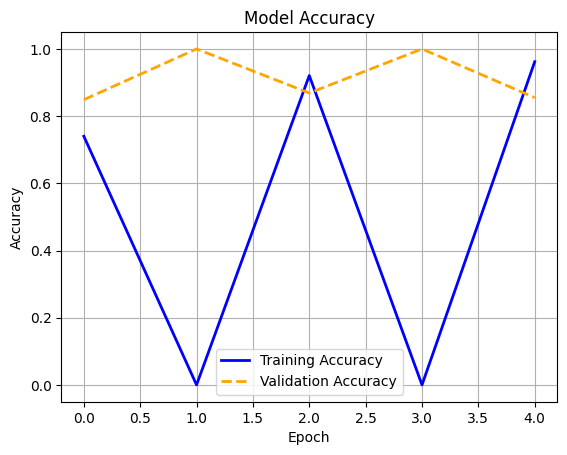

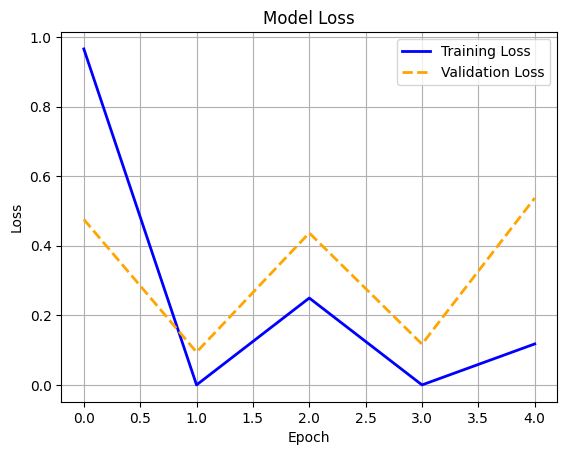

In [46]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], linestyle='-', color='blue', linewidth=2, label='Training Accuracy')
plt.plot(history.history['val_accuracy'], linestyle='--', color='orange', linewidth=2, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], linestyle='-', color='blue', linewidth=2, label='Training Loss')
plt.plot(history.history['val_loss'], linestyle='--', color='orange', linewidth=2, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

**Building a Predictive System**

In [47]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [48]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [49]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [50]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [54]:
# Example Usage
from PIL import Image
#image_path = '/content/plantvillage dataset/color/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG'
image_path = '/content/plantvillage dataset/color/Strawberry___Leaf_scorch/0024203d-6e4c-490f-b9a8-e5926df0b76e___RS_L.Scorch 0795.JPG'
#image_path = '/content/plantvillage dataset/color/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class Name: Strawberry___Leaf_scorch


In [55]:
from google.colab import drive
 drive.mount('/content/drive')

In [56]:
 model.save('/content/drive/MyDrive/Colab Notebooks/plant_disease_model.h5')